[(0, 5.192), (1, 3.998), (2, 5.616), (3, 2.828), (4, 6.666), (5, 4.622), (6, 3.4879999999999995), (7, 4.394)]
[(0, 1), (1, 1), (2, 2), (3, 6), (4, 1), (5, 1), (6, 1), (7, 1)]


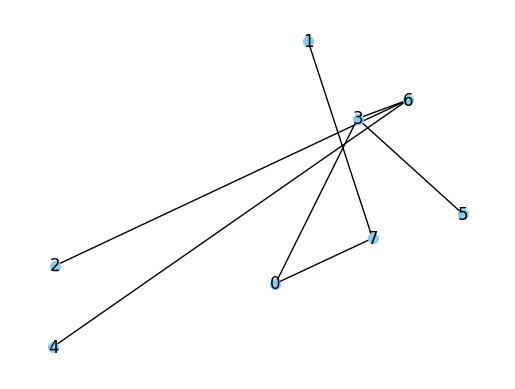

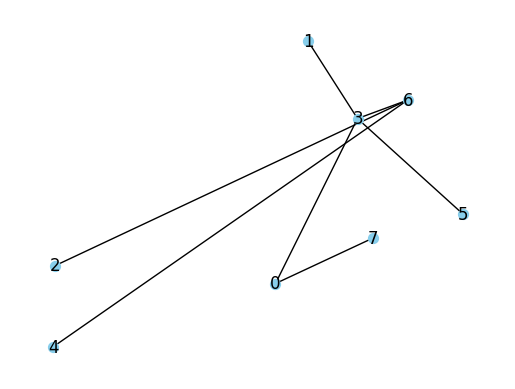

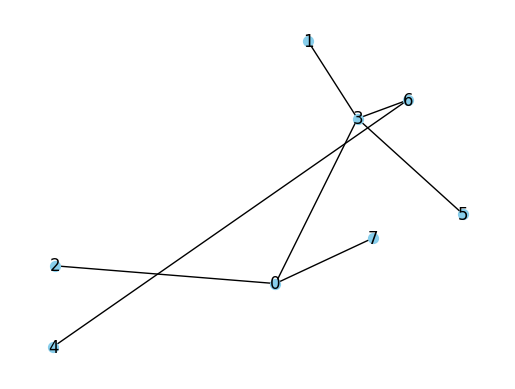

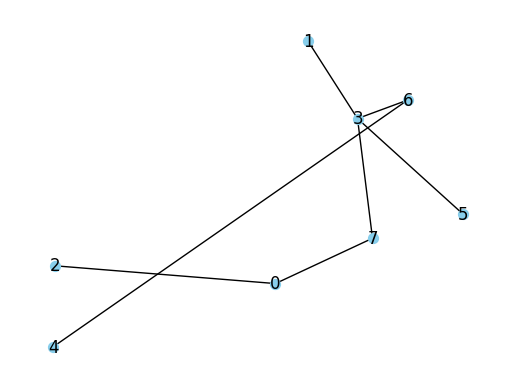

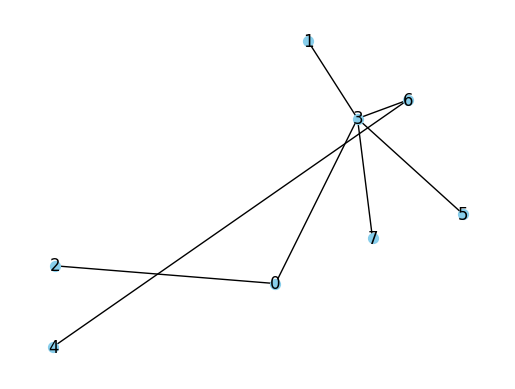

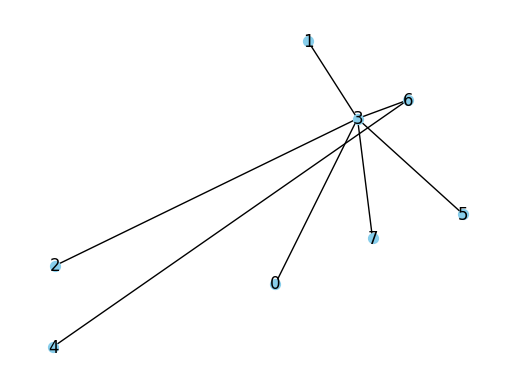

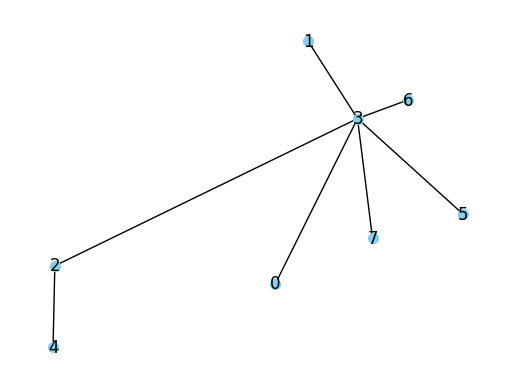

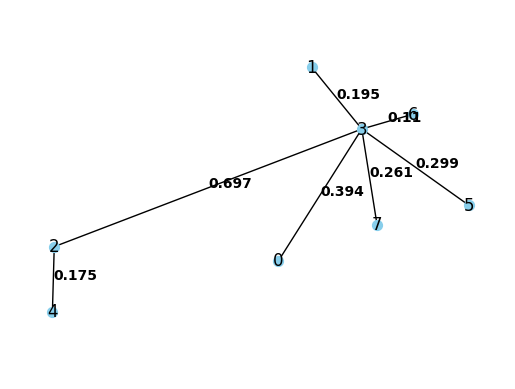

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import math
from collections import deque
import random
from itertools import combinations

def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def obtezen_graf(n):
    while True:
        G = nx.Graph()
        
        # Add nodes with random positions
        for i in range(n):
            x = random.random()
            y = random.random()
            G.add_node(i, pos=(x, y))
        
        # Add edges between nodes within radius
        for i in range(n - 1):
            v1 = random.choice(list(G.nodes))
            v2 = random.choice(list(G.nodes - set([v1])))
            G.add_edge(v1, v2)
        if nx.is_connected(G):
            pos = nx.get_node_attributes(G, 'pos')
            # Assign weights to edges based on Euclidean distances
            for (u, v) in G.edges():
                G.edges[u, v]['weight'] = round(euclidean_distance(pos[u], pos[v]), 3)
            
            return G, pos

def bfs_shortest_paths(graph, start):
    shortest_paths = {}
    distances = {vertex: float('inf') for vertex in graph.nodes()}
    queue = deque([start])
    distances[start] = 0

    while queue:
        vertex = queue.popleft()
        for neighbor in graph.neighbors(vertex):
            edge_weight = graph.edges[vertex, neighbor]['weight']
            if distances[neighbor] > distances[vertex] + edge_weight:
                distances[neighbor] = distances[vertex] + edge_weight
                shortest_paths[neighbor] = shortest_paths.get(vertex, []) + [neighbor]
                queue.append(neighbor)

    return shortest_paths, distances

def vsota_razdalj(graf, v):
    shortest_paths, distances = bfs_shortest_paths(graf, v)
    vsota = 0
    for vertex, path in shortest_paths.items():
        vsota += distances[vertex]
    return vsota

def find_best_combination_for_node(graf, v, pos):
    current_edges = list(graf.edges(v, data=True))
    all_possible_edges_v = [(v, i) for i in graf.nodes if i != v]
    k = graf.degree(v)
    best_graph = graf.copy()
    best_distance_sum = vsota_razdalj(graf, v)

    for new_edges in combinations(all_possible_edges_v, k):
        test_graph = graf.copy()
        test_graph.remove_edges_from([(v, u) for v, u, _ in current_edges])
        for edge in new_edges:
            test_graph.add_edge(*edge)
            test_graph.edges[edge]['weight'] = round(euclidean_distance(pos[edge[0]], pos[edge[1]]), 3)
        
        if nx.is_connected(test_graph):
            new_distance_sum = vsota_razdalj(test_graph, v)
            if new_distance_sum < best_distance_sum:
                best_distance_sum = new_distance_sum
                best_graph = test_graph.copy()

    return best_graph

def ekzaktno_sum(graf, pos, visualize=False):
    def loop_sum(graf):
        ravnovesni_graf = graf.copy()
        for v in graf.nodes:
            testni_graf = find_best_combination_for_node(ravnovesni_graf, v, pos)
            if nx.is_connected(testni_graf) and vsota_razdalj(graf, v) > vsota_razdalj(testni_graf, v):
                        ravnovesni_graf = testni_graf.copy()
                        fig, ax = plt.subplots()
                        nx.draw(ravnovesni_graf, pos, ax=ax, with_labels=True, node_size=50, node_color='skyblue', font_size=12)
                        return loop_sum(ravnovesni_graf)
        return ravnovesni_graf
    
    return loop_sum(graf)

# Create a sample graph
G, pos = obtezen_graf(8)

# Optimize the graph
optimized_graph = ekzaktno_sum(G, pos, visualize=True)

# Create figure and axis
fig, ax = plt.subplots()

# Draw nodes
nx.draw(optimized_graph, pos, ax=ax, with_labels=True, node_size=50, node_color='skyblue', font_size=12)

# Print the sum of distances for each node
rp = [(v, vsota_razdalj(optimized_graph, v)) for v in optimized_graph.nodes]
print(rp)
print(optimized_graph.degree())

###################################################
###################################################
###################################################
# m = max(aaa)
# [i for i, j in enumerate(aaa) if j == m]

# Display distances
for u, v, data in optimized_graph.edges(data=True):
    ax.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2, str(data['weight']), fontsize=10, color='black', fontweight='bold')

# Set axis limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()


In [19]:
# Define the lists of tuples
list1 = [(0, 4.677), (1, 3.9690000000000003), (2, 6.237), (3, 6.927), (4, 3.9690000000000003), (5, 5.649), (6, 6.896999999999999), (7, 5.529)]
list2 = [(0, 1), (1, 4), (2, 1), (3, 1), (4, 4), (5, 1), (6, 1), (7, 1)]

# Function to find the indexes of the highest values
def find_max_indexes(tuples_list):
    max_value = max(tuples_list, key=lambda x: x[1])[1]
    max_indexes = [index for index, value in tuples_list if value == max_value]
    return max_indexes

def find_min_indexes(tuples_list):
    max_value = min(tuples_list, key=lambda x: x[1])[1]
    max_indexes = [index for index, value in tuples_list if value == max_value]
    return max_indexes

min_valu1 = min(list1, key=lambda x: x[1])[1]
max_valu2 = max(list2, key=lambda x: x[1])[1]

# Get indexes of the highest values in each list
min_indexes_list1 = find_min_indexes(list1)
max_indexes_list2 = find_max_indexes(list2)

# Print the results
print(f"Indexes of the minimum values {min_valu1} in list1:", min_indexes_list1)
print(f"Indexes of the highest values {max_valu2} in list2:", max_indexes_list2)

Indexes of the minimum values 3.9690000000000003 in list1: [1, 4]
Indexes of the highest values 4 in list2: [1, 4]


In [20]:

def ekz_sum(graf, pos, visualize=False):
    def loop_sum(graf):
        ravnovesni_graf = graf.copy()
        for v in graf.nodes:
            testni_graf = find_best_combination_for_node(ravnovesni_graf, v, pos)
            if nx.is_connected(testni_graf) and vsota_razdalj(graf, v) > vsota_razdalj(testni_graf, v):
                        ravnovesni_graf = testni_graf.copy()
                        return loop_sum(ravnovesni_graf)
        return ravnovesni_graf
    
    return loop_sum(graf)


# Function to calculate the sum of direct distances from a node to all other nodes
def sum_direct_distances(graph, node, pos):
    total_distance = 0
    for other_node in graph.nodes:
        if other_node != node:
            total_distance += euclidean_distance(pos[node], pos[other_node])
    return total_distance

def n_m_c(g, poz):
    a_3 = [(n, sum_direct_distances(g, n, poz)) for n in g.nodes]
    return a_3





for i in range(10):
    g, poz = obtezen_graf(8)
    optimiziran = ekz_sum(g, poz, visualize=True)
    a_1 = g.degree()
    a_2 = [(v, vsota_razdalj(g, v)) for v in g.nodes]
    a_3 = n_m_c(g, poz)
    b_1 = optimiziran.degree()
    b_2 = [(v, vsota_razdalj(optimiziran, v)) for v in optimiziran.nodes]
    m_a_1 = max(a_1, key=lambda x: x[1])[1]
    m_a_2 = min(a_2, key=lambda x: x[1])[1]
    m_a_3 = min(a_3, key=lambda x: x[1])[1]
    m_b_1 = max(b_1, key=lambda x: x[1])[1]
    m_b_2 = min(b_2, key=lambda x: x[1])[1]
    mi_a_1 = find_max_indexes(a_1)
    mi_a_2 = find_min_indexes(a_2)
    mi_a_3 = find_min_indexes(a_3)
    mi_b_1 = find_max_indexes(b_1)
    mi_b_2 = find_min_indexes(b_2)
    print(f"največ povezav {m_a_1}, indeks {mi_a_1}")
    print(f"največ povezav {m_b_1}, indeks {mi_b_1}")
    print(f"najcenejša cena {m_a_2}, indeks {mi_a_2}")
    print(f"najcenejša cena {m_b_2}, indeks {mi_b_2}")
    print(f"najcenejša potencialna cena {m_a_3}, indeks {mi_a_3}")
    print()

največ povezav 3, indeks [1, 3]
največ povezav 5, indeks [3]
najcenejša cena 4.845, indeks [1, 3]
najcenejša cena 3.1929999999999996, indeks [3]
najcenejša potencialna cena 3.1368843746199144, indeks [3]

največ povezav 3, indeks [0, 6]
največ povezav 6, indeks [3]
najcenejša cena 6.366999999999999, indeks [5]
najcenejša cena 2.8280000000000003, indeks [3]
najcenejša potencialna cena 2.7554622354307865, indeks [3]

največ povezav 4, indeks [4]
največ povezav 6, indeks [0]
najcenejša cena 6.729, indeks [4]
najcenejša cena 3.141, indeks [0]
najcenejša potencialna cena 3.130571829195797, indeks [0]

največ povezav 3, indeks [4]
največ povezav 4, indeks [3]
najcenejša cena 6.279999999999999, indeks [6]
najcenejša cena 3.743, indeks [1, 3]
najcenejša potencialna cena 3.15192013135435, indeks [3]

največ povezav 3, indeks [0, 6]
največ povezav 4, indeks [3]
najcenejša cena 5.712, indeks [0]
najcenejša cena 3.0410000000000004, indeks [3]
najcenejša potencialna cena 2.9680790977728946, indeks 

In [21]:
import networkx as nx


def vsota_r(graf, vozlisce):
    vsota = 0
    for v in graf.nodes - {vozlisce}:
        vsota += nx.shortest_path_length(graf, vozlisce, v)
    return vsota


def e_sum(graf):
    def loop_sum(graf):
        ravnovesni_graf = graf.copy()
        for v1 in graf.nodes:
            for p in list(graf.edges(v1)):
                for v2 in graf.nodes - {v1}:
                    testni_graf = graf.copy()
                    testni_graf.remove_edge(*p)
                    testni_graf.add_edge(v1, v2)
                    if nx.is_connected(testni_graf):
                        if vsota_r(graf, v1) > vsota_r(testni_graf, v1):
                            ravnovesni_graf = testni_graf.copy()
                            return loop_sum(ravnovesni_graf)
                        
        return ravnovesni_graf
    
    return loop_sum(graf)


def nakljucni_zacetni_graf(n):
    # Create an initial random graph with the specified number of nodes
    G = nx.gnm_random_graph(n, n - 1)
    # Ensure the graph is connected
    while not nx.is_connected(G):
        G = nx.gnm_random_graph(n, n - 1)
    return G


for i in range(10):
    g = nakljucni_zacetni_graf(8)
    optimiziran = e_sum(g)
    a_1 = g.degree()
    a_2 = [(v, vsota_r(g, v)) for v in g.nodes]
    b_1 = optimiziran.degree()
    b_2 = [(v, vsota_r(optimiziran, v)) for v in optimiziran.nodes]
    m_a_1 = max(a_1, key=lambda x: x[1])[1]
    m_a_2 = min(a_2, key=lambda x: x[1])[1]
    m_b_1 = max(b_1, key=lambda x: x[1])[1]
    m_b_2 = min(b_2, key=lambda x: x[1])[1]
    mi_a_1 = find_max_indexes(a_1)
    mi_a_2 = find_min_indexes(a_2)
    mi_b_1 = find_max_indexes(b_1)
    mi_b_2 = find_min_indexes(b_2)
    print(f"največ povezav {m_a_1}, indeks {mi_a_1}")
    print(f"največ povezav {m_b_1}, indeks {mi_b_1}")
    print(f"najcenejša cena {m_a_2}, indeks {mi_a_2}")
    print(f"najcenejša cena {m_b_2}, indeks {mi_b_2}")
    print()

največ povezav 3, indeks [3]
največ povezav 7, indeks [1]
najcenejša cena 13, indeks [3]
najcenejša cena 7, indeks [1]

največ povezav 4, indeks [3]
največ povezav 7, indeks [3]
najcenejša cena 11, indeks [3]
najcenejša cena 7, indeks [3]

največ povezav 2, indeks [1, 2, 3, 5, 6, 7]
največ povezav 7, indeks [1]
najcenejša cena 16, indeks [1, 2]
najcenejša cena 7, indeks [1]

največ povezav 3, indeks [2, 7]
največ povezav 7, indeks [2]
najcenejša cena 12, indeks [2]
najcenejša cena 7, indeks [2]

največ povezav 3, indeks [0]
največ povezav 7, indeks [1]
najcenejša cena 14, indeks [0, 7]
najcenejša cena 7, indeks [1]

največ povezav 3, indeks [1]
največ povezav 7, indeks [1]
najcenejša cena 14, indeks [1, 3]
najcenejša cena 7, indeks [1]

največ povezav 4, indeks [3]
največ povezav 7, indeks [3]
najcenejša cena 11, indeks [3]
najcenejša cena 7, indeks [3]

največ povezav 3, indeks [2]
največ povezav 7, indeks [2]
najcenejša cena 14, indeks [2, 5]
najcenejša cena 7, indeks [2]

največ pov